In [94]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "./config/windy-nova-364604-7a2df3513239.json"
from google.cloud import vision
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [95]:
path = "/Users/kyoma/Desktop/2.png"

client = vision.ImageAnnotatorClient()
with io.open(path, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)
response = client.document_text_detection(image=image)
print()

In [96]:
blocks = response.full_text_annotation.pages[0].blocks

In [104]:
blocks[0].paragraphs[0]

bounding_box {
  vertices {
    x: 17
    y: 20
  }
  vertices {
    x: 463
    y: 14
  }
  vertices {
    x: 463
    y: 52
  }
  vertices {
    x: 17
    y: 58
  }
}
words {
  property {
    detected_languages {
      language_code: "en"
      confidence: 1.0
    }
  }
  bounding_box {
    vertices {
      x: 17
      y: 20
    }
    vertices {
      x: 294
      y: 16
    }
    vertices {
      x: 294
      y: 54
    }
    vertices {
      x: 17
      y: 58
    }
  }
  symbols {
    bounding_box {
      vertices {
        x: 17
        y: 21
      }
      vertices {
        x: 38
        y: 21
      }
      vertices {
        x: 38
        y: 58
      }
      vertices {
        x: 17
        y: 58
      }
    }
    text: "S"
    confidence: 0.9359477758407593
  }
  symbols {
    bounding_box {
      vertices {
        x: 40
        y: 20
      }
      vertices {
        x: 62
        y: 20
      }
      vertices {
        x: 62
        y: 57
      }
      vertices {
        x: 40
   

In [99]:
type(blocks)

proto.marshal.collections.repeated.RepeatedComposite

In [100]:


i = 0
for block in blocks:
    print(f"====={i}=======")
    print(block.bounding_box)
    i += 1
    

=====0=======
vertices {
  x: 14
  y: 16
}
vertices {
  x: 853
  y: 12
}
vertices {
  x: 855
  y: 534
}
vertices {
  x: 16
  y: 538
}

=====1=======
vertices {
  x: 905
  y: 23
}
vertices {
  x: 1746
  y: 24
}
vertices {
  x: 1746
  y: 522
}
vertices {
  x: 905
  y: 521
}



In [105]:
def get_box(data):
    vertices = ([(vertex.x, vertex.y) for vertex in data.vertices])
    return vertices


In [122]:
    rets = []

    blocks = response.full_text_annotation.pages[0].blocks
    for block in blocks:
        ret = []
        print(len(block.paragraphs))
        for paragraph in block.paragraphs:

            
            text = ""
            # get test
            for word in paragraph.words:

                for symbol in word.symbols:
                    # print(symbol)
                    end = ""
                    if str(symbol.property.detected_break.type_)=="BreakType.SPACE":
                        end = " "
                    # print(symbol.text, end=end)
                    text += symbol.text + end
                    
                # print(text)
            
            ret.append(text)
            # get box
            vertices = get_box(paragraph.bounding_box)
            print(text, vertices)
            ret.append(vertices)
        # print(ret)
        rets.append(ret)
        
    print(rets)

3
Supplementary Material [(17, 20), (463, 14), (463, 52), (17, 58)]
A. Additional Empirical Results [(17, 96), (597, 96), (597, 133), (17, 133)]
CL with other CIFAR-100 super-classes. In Section 3we present results when learning to discriminate the "smallmammals" super-class of CIFAR-100. Similar results can beobtained for other super-classes of CIFAR-100. Each superclass contains 3000 images, divided into 5 related classesof CIFAR-100. Each class contains 600 images dividedinto 500 train images and 100 test images. Specifically, wetested our method on the super-classes of "people", "insects"and "aquatic mammals" and found that CL trained on these [(17, 169), (854, 169), (854, 534), (17, 534)]
1
itative results are obtained when using other large networkstrained on ImageNet as teachers, and other classifiers toestablish a confidence score. Specifically, we repeated theexperiments with a transfer scoring function based on thepre-trained VGG-16 and ResNet networks, which are alsotrained 

In [103]:
    rets = []

    blocks = response.full_text_annotation.pages[0].blocks
    for block in blocks:

        for paragraph in block.paragraphs:
            ret = []
            text = ""
            # get test
            for word in paragraph.words:
                for symbol in word.symbols:
                    end = ""
                    if str(symbol.property.detected_break.type_)=="BreakType.SPACE":
                        end = " "
                    # print(symbol.text, end=end)
                    text += symbol.text + end

            ret.append(text)
            # get box
            vertices = get_box(paragraph.bounding_box)
            ret.append(vertices)

        rets.append(ret)

TypeError: list.append() takes exactly one argument (0 given)

In [90]:
for block in blocks:
    # print(get_box(block.bounding_box))
    for paragraph in block.paragraphs:
        print(get_box(paragraph.bounding_box))
        for word in paragraph.words:
            for symbol in word.symbols:
                end = ""
                if str(symbol.property.detected_break.type_)=="BreakType.SPACE":
                    end = " "
                print(symbol.text, end=end)
        print("\n")


[(16, 20), (487, 20), (487, 167), (16, 167)]
Figure 9. Results in case 1. Comparing different variants of thetransfer scoring function. The inset bars show the final accuracyof the learning curves. The error bars shows STE after 50 repetitions for the vanilla and Inception conditions with RBF kernelSVM, and 5 repetitions for the ResNet, VGG-16 and the LinearSVM conditions. (a) Comparing different teacher networks. (b)Comparing different classifiers for the hardness score.

[(16, 207), (489, 208), (489, 419), (16, 418)]
Varied exponential pacing. We define Varied exponential pacing similarly to fixed exponential pacing, only allowing to change the step_length for each step. Theoretically,this method results in additional hyper-parameters equal tothe number of performed steps. In practice, to avoid anunfeasible need to tune too many hyper-parameters, we varyonly the first two step_length instances and fix the rest. Thisis reasonable as most of the power of the curriculum lies inthe first

In [34]:
img = mpimg.imread(path)
img.shape

(442, 520, 4)

In [35]:
tmp_img = img

In [36]:
tmp_img[207:418,16:489, :] = 0.5

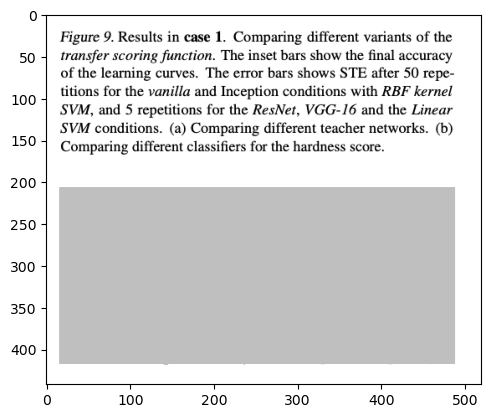

In [37]:
plt.imshow(img)